In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import execute, QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


 110
 010


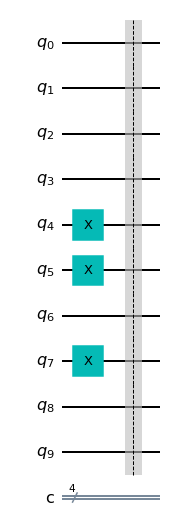

In [2]:
b1 = input()
b2 = input()

qc1 = QuantumCircuit( 3 * len(b1) + 1, len(b1) + 1)

#qc1.x(0) # First Carry Bit

for i in range(len(b1) - 1, -1, -1):
    if b1[i] == "1":
        qc1.x(3 * (len(b1) - 1 - i) + 1)
    if b2[i] == "1":
        qc1.x(3 * (len(b1) - 1 - i) + 2)
   
qc1.barrier()
qc1.draw()

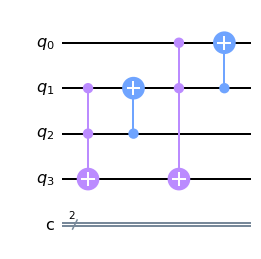

In [3]:
qc2 = QuantumCircuit(4,2)
qc2.ccx(1,2,3)
qc2.cx(2,1)
qc2.ccx(0,1,3)
qc2.cx(1,0)
qc2.draw()

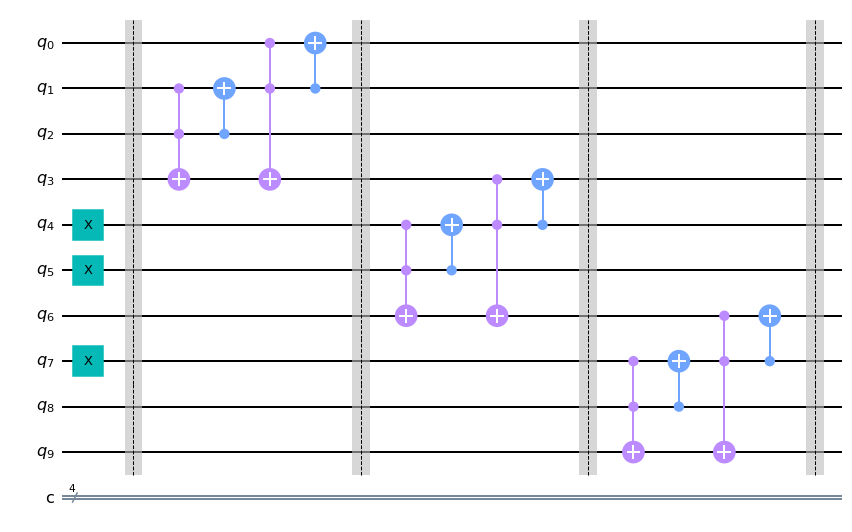

In [4]:
for i in range(len(b1)):
    t = 3 * i
    qc1 = qc1.compose(qc2, [t, t+1, t+2, t+3])
    qc1.barrier()
    
qc1.draw()

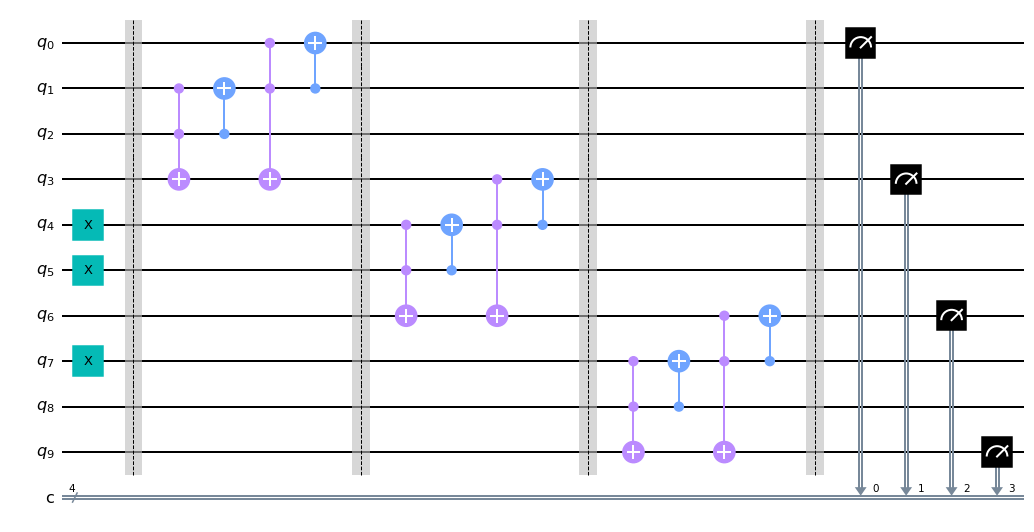

In [5]:
for i in range(len(b1) + 1):
    qc1.measure(3 * i, i)
qc1.draw()

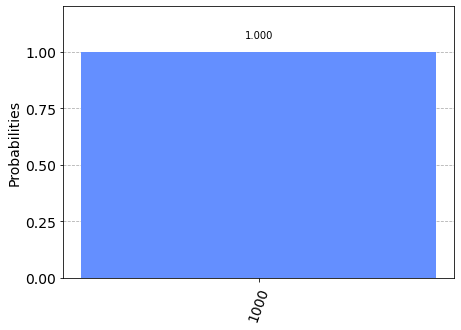

In [6]:
counts = execute(qc1, Aer.get_backend("qasm_simulator")).result().get_counts()
plot_histogram(counts)